In [20]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import nltk

In [21]:
# import the builtin time module
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import (BaggingClassifier,
                              RandomForestClassifier,
                              AdaBoostClassifier)

from sklearn.tree import DecisionTreeClassifier

In [22]:
import gensim

In [ ]:
 nltk.download('all')

In [24]:
olid_df = pd.read_csv('/content/olid-training-v1.0.tsv', sep='\t')


In [25]:
olid_df

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH
13238,27429,@USER Pussy,OFF,UNT,NaN


In [26]:
#dropping irrelevant columns
olid_df.drop(columns=['subtask_b', 'subtask_c'])

#lowercase
olid_df['tweet'] = [entry.lower() for entry in olid_df['tweet']]


In [27]:
#tokenization
olid_df['tweet']= [word_tokenize(entry) for entry in olid_df['tweet']]


In [28]:
#StopWord Removal and Lemmatization
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(olid_df['tweet']):

    Final_words = []
    word_Lemmatized = WordNetLemmatizer()

    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    
    
    olid_df.loc[index,'text_final'] = str(Final_words)

In [29]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(olid_df['text_final'],olid_df['subtask_a'],test_size=0.30)

In [30]:
Tfidf_vect = TfidfVectorizer(max_features=6000)
Tfidf_vect.fit(olid_df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [31]:
Encoder = LabelEncoder()
# 0 NOT Offensive
# 1 Offensive

Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [32]:
olid_df

,id,tweet,subtask_a,subtask_b,subtask_c,text_final
0,86426,"[@, user, she, should, ask, a, few, native, am...",OFF,UNT,NaN,"['user', 'ask', 'native', 'american', 'take']"
1,90194,"[@, user, @, user, go, home, you, ’, re, drunk...",OFF,TIN,IND,"['user', 'user', 'go', 'home', 'drunk', 'user'..."
2,16820,"[amazon, is, investigating, chinese, employees...",NOT,NaN,NaN,"['amazon', 'investigate', 'chinese', 'employee..."
3,62688,"[@, user, someone, should'vetaken, '', this, p...",OFF,UNT,NaN,"['user', 'someone', 'piece', 'shit', 'volcano']"
4,43605,"[@, user, @, user, obama, wanted, liberals, &,...",NOT,NaN,NaN,"['user', 'user', 'obama', 'want', 'liberal', '..."
...,...,...,...,...,...,...
13235,95338,"[@, user, sometimes, i, get, strong, vibes, fr...",OFF,TIN,IND,"['user', 'sometimes', 'get', 'strong', 'vibe',..."
13236,67210,"[benidorm, ✅, creamfields, ✅, maga, ✅, not, to...",NOT,NaN,NaN,"['benidorm', 'creamfields', 'maga', 'shabby', ..."
13237,82921,"[@, user, and, why, report, this, garbage, ., ...",OFF,TIN,OTH,"['user', 'report', 'garbage', 'give', 'crap']"
13238,27429,"[@, user, pussy]",OFF,UNT,NaN,"['user', 'pussy']"



0.010798931121826172
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      2682
           1       0.79      0.26      0.39      1290

    accuracy                           0.74      3972
   macro avg       0.76      0.61      0.61      3972
weighted avg       0.75      0.74      0.69      3972

[[2594   88]
 [ 956  334]]


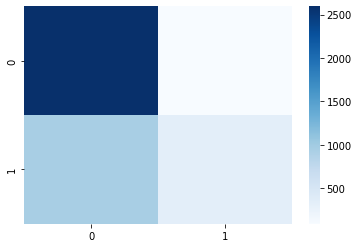

In [33]:
#Naive Bayes

# Grab Currrent Time Before Running the Code
start = time.time()


NB = MultinomialNB().fit(Train_X_Tfidf,Train_Y)
predictions_NB = NB.predict(Test_X_Tfidf)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("\n"+ str(total_time)) 

cf2_matrix = confusion_matrix(Test_Y, predictions_NB)
ax1 = sns.heatmap(cf2_matrix, cmap='Blues')
cf2_matrix

print(classification_report(Test_Y,predictions_NB))
print(confusion_matrix(Test_Y,predictions_NB))


In [34]:
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree_1 = DecisionTreeClassifier(criterion='entropy')
random_forest = RandomForestClassifier(n_estimators=300, criterion = "entropy")
adaboost = AdaBoostClassifier(n_estimators=300,
                              learning_rate=0.2)
bagging = BaggingClassifier(n_estimators=200)


367.90548872947693
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2682
           1       0.71      0.47      0.56      1290

    accuracy                           0.76      3972
   macro avg       0.74      0.69      0.70      3972
weighted avg       0.76      0.76      0.75      3972

[[2431  251]
 [ 684  606]]


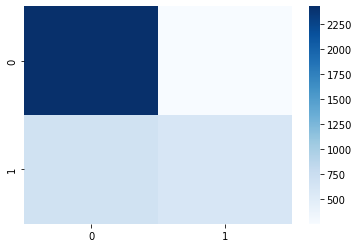

In [35]:
# Bagging Classifier 

# Grab Currrent Time Before Running the Code
start = time.time()


bg = bagging.fit(Train_X_Tfidf,Train_Y)
predictions_bg = bg.predict(Test_X_Tfidf)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("\n"+ str(total_time)) 

cf2_matrix = confusion_matrix(Test_Y, predictions_bg)
ax1 = sns.heatmap(cf2_matrix, cmap='Blues')
cf2_matrix

print(classification_report(Test_Y,predictions_bg))
print(confusion_matrix(Test_Y,predictions_bg))



2.4775755405426025
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      2682
           1       0.58      0.50      0.53      1290

    accuracy                           0.72      3972
   macro avg       0.67      0.66      0.67      3972
weighted avg       0.71      0.72      0.71      3972

[[2207  475]
 [ 647  643]]


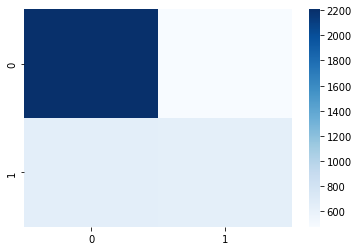

In [36]:
# Decision Tree : gini

# Grab Currrent Time Before Running the Code
start = time.time()


dt = decision_tree.fit(Train_X_Tfidf,Train_Y)
predictions_dt = dt.predict(Test_X_Tfidf)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("\n"+ str(total_time)) 

cf2_matrix = confusion_matrix(Test_Y, predictions_dt)
ax1 = sns.heatmap(cf2_matrix, cmap='Blues')
cf2_matrix

print(classification_report(Test_Y,predictions_dt))
print(confusion_matrix(Test_Y,predictions_dt))



2.783827304840088
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      2682
           1       0.57      0.50      0.53      1290

    accuracy                           0.72      3972
   macro avg       0.67      0.66      0.67      3972
weighted avg       0.71      0.72      0.71      3972

[[2199  483]
 [ 644  646]]


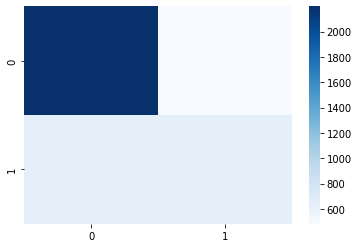

In [37]:
# Decision Tree : Entropy

# Grab Currrent Time Before Running the Code
start = time.time()


dt1 = decision_tree_1.fit(Train_X_Tfidf,Train_Y)
predictions_dt1 = dt1.predict(Test_X_Tfidf)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("\n"+ str(total_time)) 

cf2_matrix = confusion_matrix(Test_Y, predictions_dt1)
ax1 = sns.heatmap(cf2_matrix, cmap='Blues')
cf2_matrix

print(classification_report(Test_Y,predictions_dt1))
print(confusion_matrix(Test_Y,predictions_dt1))


39.4072060585022
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2682
           1       0.78      0.40      0.53      1290

    accuracy                           0.77      3972
   macro avg       0.77      0.67      0.69      3972
weighted avg       0.77      0.77      0.74      3972

[[2538  144]
 [ 779  511]]


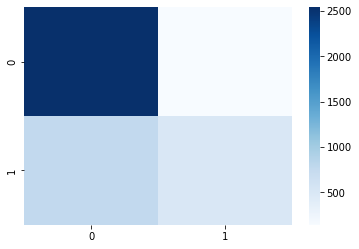

In [38]:
# Random Forrest

# Grab Currrent Time Before Running the Code
start = time.time()


rf = random_forest.fit(Train_X_Tfidf,Train_Y)
predictions_rf = rf.predict(Test_X_Tfidf)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("\n"+ str(total_time)) 

cf2_matrix = confusion_matrix(Test_Y, predictions_rf)
ax1 = sns.heatmap(cf2_matrix, cmap='Blues')
cf2_matrix

print(classification_report(Test_Y,predictions_rf))
print(confusion_matrix(Test_Y,predictions_rf))



8.17167329788208
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2682
           1       0.81      0.34      0.48      1290

    accuracy                           0.76      3972
   macro avg       0.78      0.65      0.66      3972
weighted avg       0.77      0.76      0.73      3972

[[2575  107]
 [ 847  443]]


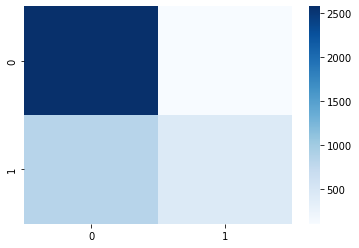

In [39]:
# AdaBoost 

# Grab Currrent Time Before Running the Code
start = time.time()


ad = adaboost.fit(Train_X_Tfidf,Train_Y)
predictions_ad = ad.predict(Test_X_Tfidf)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("\n"+ str(total_time)) 

cf2_matrix = confusion_matrix(Test_Y, predictions_ad)
ax1 = sns.heatmap(cf2_matrix, cmap='Blues')
cf2_matrix

print(classification_report(Test_Y,predictions_ad))
print(confusion_matrix(Test_Y,predictions_ad))
